In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns


In [2]:
df = pd.read_csv("C:/Users/Gayatri/Desktop/py4e/FarmEasy/cropdataNew3.csv")

xtrain = df.iloc[:2880, :7].values    
ytrain = df.iloc[:2880, -1].values
xtest = df.iloc[2880:, :7].values
ytest = df.iloc[2880:, -1].values
acc = []


In [10]:
model = ['Random Forest','Decision Tree','Support vector machine']

In [3]:
from sklearn.ensemble import RandomForestClassifier
#Fitting model with trainig data
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix
rfc = RandomForestClassifier( )
rfc.fit(xtrain, ytrain)
predicted_values=rfc.predict(xtest)
x = metrics.accuracy_score(ytest,predicted_values)
acc.append(x)
#model.append('rfc')
print("RF's Accuracy is: ", x)
# Saving model to disk
pickle.dump(rfc, open('model2.pkl','wb'))
# Loading model to compare the results
model = pickle.load(open('model2.pkl','rb'))
print(classification_report(ytest,predicted_values))

RF's Accuracy is:  0.9953125
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        31
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        32
      grapes       1.00      1.00      1.00        22
        jute       1.00      1.00      1.00        37
 kidneybeans       1.00      1.00      1.00        33
      lentil       0.93      1.00      0.96        26
       maize       1.00      1.00      1.00        36
       mango       1.00      1.00      1.00        27
   mothbeans       1.00      0.92      0.96        26
    mungbean       1.00      1.00      1.00        36
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      0.97      0.98        3

In [4]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(xtrain,ytrain)

predicted_values1 = DecisionTree.predict(xtest)
x1 = metrics.accuracy_score(ytest, predicted_values1)
acc.append(x1)
#model.append('DecisionTree')
print("DecisionTrees's Accuracy is: ", x)

print(classification_report(ytest,predicted_values1))

DecisionTrees's Accuracy is:  0.9953125
              precision    recall  f1-score   support

       apple       0.88      1.00      0.94        23
      banana       0.74      1.00      0.85        31
   blackgram       0.95      0.80      0.87        25
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      0.70      0.82        20
      coffee       1.00      1.00      1.00        33
      cotton       1.00      0.59      0.75        32
      grapes       1.00      1.00      1.00        22
        jute       0.88      1.00      0.94        37
 kidneybeans       1.00      0.91      0.95        33
      lentil       0.87      1.00      0.93        26
       maize       0.95      1.00      0.97        36
       mango       0.96      1.00      0.98        27
   mothbeans       0.77      0.77      0.77        26
    mungbean       1.00      1.00      1.00        36
   muskmelon       1.00      1.00      1.00        20
      orange       0.72      0.91      0.

In [5]:
#SVM
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
X_train_norm = norm.transform(xtrain)
# transform testing dataabs
X_test_norm = norm.transform(xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,ytrain)
predicted_values2 = SVM.predict(X_test_norm)
x2 = metrics.accuracy_score(ytest, predicted_values2)
acc.append(x2)
#model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(ytest,predicted_values2))

SVM's Accuracy is:  0.9953125
              precision    recall  f1-score   support

       apple       0.88      1.00      0.94        23
      banana       0.97      1.00      0.98        31
   blackgram       0.96      1.00      0.98        25
    chickpea       1.00      1.00      1.00        31
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        32
      grapes       1.00      1.00      1.00        22
        jute       0.97      0.92      0.94        37
 kidneybeans       1.00      1.00      1.00        33
      lentil       0.89      0.96      0.93        26
       maize       1.00      1.00      1.00        36
       mango       1.00      1.00      1.00        27
   mothbeans       1.00      0.88      0.94        26
    mungbean       1.00      1.00      1.00        36
   muskmelon       1.00      1.00      1.00        20
      orange       0.94      0.91      0.92        

['muskmelon' 'coconut' 'coffee' 'rice' 'mothbeans' 'kidneybeans' 'cotton'
 'jute' 'lentil' 'mango' 'watermelon' 'maize' 'pigeonpeas' 'mungbean'
 'pomegranate' 'orange' 'banana' 'apple' 'chickpea' 'papaya' 'blackgram'
 'grapes']
AxesSubplot(0.125,0.125;0.62x0.755)


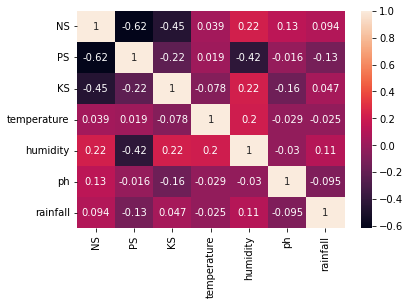

In [6]:
print(df['label'].unique())
print(sns.heatmap(df.corr(),annot=True))

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

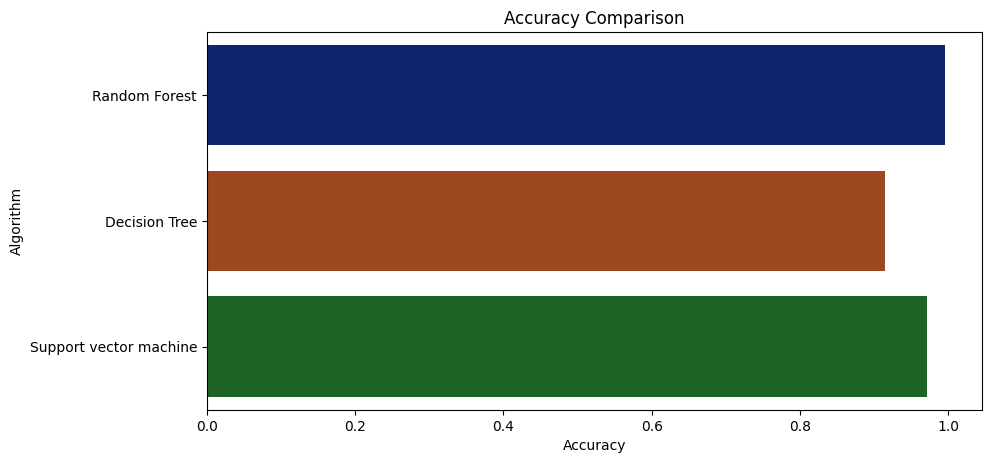

In [11]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')